In [114]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [115]:
import numpy as np


texts = [
    ["Soccer is a popular sport", "Basketball is a team sport"],
    ["The Eiffel Tower is in Paris", "The Statue of Liberty is in New York"],
    ["Mangoes are a tropical fruit", "Pineapples are also tropical fruits"],
    ["Hiking in the mountains is refreshing", "Swimming in the ocean is relaxing"],
    ["Computer science involves coding", "Biology focuses on living organisms"],
    ["The Earth orbits the Sun", "The Moon orbits the Earth"],
    ["Cats have whiskers", "Snakes are limbless reptiles"],
    ["Writing code can be challenging", "Reading books is a leisurely activity"],
    ["Chemistry deals with chemical reactions", "Physics studies the laws of nature"],
    ["Mount Everest is the world's tallest peak", "K2 is also a tall mountain"],
    ["Artists create visual masterpieces", "Musicians compose melodious tunes"],
    ["Summer is hot and sunny", "Winter is cold and snowy"],
    ["Insects have six legs", "Spiders are arachnids with eight legs"],
    ["London is the capital of England", "Tokyo is the capital of Japan"],
    ["Learning a new language is a valuable skill", "Cooking delicious food is an art"],
    ["Elephants are large mammals", "Kangaroos are marsupials"],
    ["Rivers flow downstream to the sea", "Waterfalls are breathtaking natural wonders"],
    ["Astronomy explores celestial objects", "Geology studies the Earth's structure"],
    ["Singing requires vocal talent", "Dancing showcases body movements"],
    ["Gardening is a peaceful hobby", "Extreme sports offer adrenaline rushes"]
]
labels = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
vocab_size = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(texts)
max_seq_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_seq_length)

input_pairs = [(sequences[i], sequences[j]) for i in range(len(texts)) for j in range(len(texts)) if i != j]
labels = np.array(labels * (len(texts) - 1))  

indices = np.arange(len(input_pairs))
np.random.shuffle(indices)
input_pairs = np.array(input_pairs)[indices]
labels = labels[indices]


In [116]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Lambda
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K


input_a = Input(shape=(max_seq_length,))
input_b = Input(shape=(max_seq_length,))

embedding_layer = Embedding(input_dim=vocab_size, output_dim=128)

encoded_a = embedding_layer(input_a)
encoded_b = embedding_layer(input_b)

def cosine_similarity(vectors):
    x, y = vectors
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return K.sum(x * y, axis=-1)

similarity_layer = Lambda(cosine_similarity, output_shape=(1,))([encoded_a, encoded_b])

siamese_model = Model(inputs=[input_a, input_b], outputs=similarity_layer)


In [117]:

siamese_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [118]:

siamese_model.fit([input_pairs[:, 0], input_pairs[:, 1]], labels, epochs=10, batch_size=32)


Epoch 1/10
12/12 [==============================] - 1s 2ms/step - loss: 0.4937 - accuracy: 0.4368
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.4421
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.4474
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2489 - accuracy: 0.4553
Epoch 5/10
12/12 [==============================] - 0s 1ms/step - loss: 0.2228 - accuracy: 0.4737
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.2132 - accuracy: 0.4737
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.4842
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.4816
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.5132
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.5053


In [119]:
# Example new text pair
new_text_pair = ["I enjoy reading books", "Reading is my favorite hobby"]

# Preprocess the new text pair (tokenization and padding)
new_sequences = tokenizer.texts_to_sequences(new_text_pair)
new_sequences = pad_sequences(new_sequences, maxlen=max_seq_length)

# Make predictions
similarity_score = siamese_model.predict([new_sequences[0], new_sequences[1]])

# Print the similarity score
print(f"Similarity Score: {similarity_score[0]}")

# You can define a threshold to decide if the texts are similar or dissimilar
threshold = 0.5  # Adjust this threshold as needed
if similarity_score[0] > threshold:
    print("The texts are similar.")
else:
    print("The texts are dissimilar.")


1/1 [==============================] - 0s 113ms/step
Similarity Score: 1.0000001192092896
The texts are similar.


In [120]:

validation_pairs = [
    ["Soccer is a popular sport", "Basketball is a team sport"],
    ["The Eiffel Tower is in Paris", "The Statue of Liberty is in New York"],
    ["Mangoes are a tropical fruit", "Pineapples are also tropical fruits"],
    ["Hiking in the mountains is refreshing", "Swimming in the ocean is relaxing"],
    ["Computer science involves coding", "Biology focuses on living organisms"],
    ["The Earth orbits the Sun", "The Moon orbits the Earth"],
    ["Cats have whiskers", "Snakes are limbless reptiles"],
    ["Writing code can be challenging", "Reading books is a leisurely activity"],
    ["Chemistry deals with chemical reactions", "Physics studies the laws of nature"],
    ["Mount Everest is the world's tallest peak", "K2 is also a tall mountain"],
    ["Artists create visual masterpieces", "Musicians compose melodious tunes"],
    ["Summer is hot and sunny", "Winter is cold and snowy"],
    ["Insects have six legs", "Spiders are arachnids with eight legs"],
    ["London is the capital of England", "Tokyo is the capital of Japan"],
    ["Learning a new language is a valuable skill", "Cooking delicious food is an art"],
    ["Elephants are large mammals", "Kangaroos are marsupials"],
    ["Rivers flow downstream to the sea", "Waterfalls are breathtaking natural wonders"],
    ["Astronomy explores celestial objects", "Geology studies the Earth's structure"],
    ["Singing requires vocal talent", "Dancing showcases body movements"],
    ["Gardening is a peaceful hobby", "Extreme sports offer adrenaline rushes"]
]

validation_labels = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [121]:
validation_sequences = tokenizer.texts_to_sequences([pair[0] for pair in validation_pairs])
validation_sequences = pad_sequences(validation_sequences, maxlen=max_seq_length)
validation_sequences_2 = tokenizer.texts_to_sequences([pair[1] for pair in validation_pairs])
validation_sequences_2 = pad_sequences(validation_sequences_2, maxlen=max_seq_length)

# Calculate similarity scores
similarity_scores = siamese_model.predict([validation_sequences, validation_sequences_2])

1/1 [==============================] - 0s 146ms/step


In [122]:
# Define the threshold (you can adjust this as needed)
threshold = 0.5

# Initialize counters
true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

# Compare each similarity score to the threshold
for i in range(len(validation_labels)):
    if validation_labels[i] == 1:
        if similarity_scores[i][0] >= threshold:
            true_positives += 1
        else:
            false_negatives += 1
    else:
        if similarity_scores[i][0] >= threshold:
            false_positives += 1
        else:
            true_negatives += 1

# Calculate F1 score
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print F1 score
print(f"F1 Score: {f1_score:.2f}")


F1 Score: 0.67


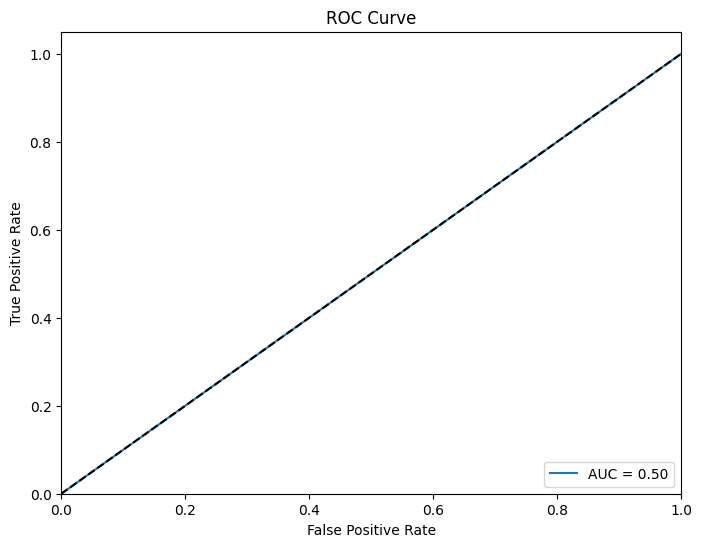

In [123]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(validation_labels, similarity_scores[:, 0])  # Extract the first column
roc_auc = roc_auc_score(validation_labels, similarity_scores[:, 0])  # Extract the first column

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
